# Анализ бизнес-показателей Procrastinate Pro+

Цели проекта:
- Изучить основные каналы привлечения пользователей;
- Рассмотреть целесообразность затрат на рекламу и их "масштаб";
- Проанализировать LTV или "пожизненную ценность" клиентов;
- Оценить окупаемость клиентов;
- Обозначить факторы, которые мешают окупаемости.

### Загрузить данные и подготовить их к анализу

Загрузить данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

Изучить данные и выполнить предобработку. Есть ли в данных пропуски и дубликаты? Убедиться, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратить внимание на столбцы с датой и временем.

Импортируем библиотеки, которые собираемся использовать.

In [1]:
#Импорт используемых библиотек
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

Загружаем данные. Просматриваем информацию о количестве записей и их типах данных.

In [2]:
#Загрузка данных
visits, orders, costs  = (
    pd.read_csv(r'C:\Users\Leron\Desktop\my\project\all_projects\visits.csv'),
    pd.read_csv(r'C:\Users\Leron\Desktop\my\project\all_projects\orders.csv'),
    pd.read_csv(r'C:\Users\Leron\Desktop\my\project\all_projects\costs.csv'),
)
#Просмотр основной информации о данных
visits.info()
orders.info()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   

Проверяем, есть ли пустые значения, нули или дубликаты в наших датафреймах. 

*По идеи, пропусков быть не должно. Я предполагаю, что данные собирались в Яндекс.Метрике или Google Analytics. С сайта отправка данных на сервис веб-аналитики осуществляется автоматически, в зависимости от настроек. Но все равно проверим.*

In [3]:
visits.isnull().sum() 

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [4]:
orders.isnull().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [5]:
costs.isnull().sum()

dt         0
Channel    0
costs      0
dtype: int64

In [6]:
visits[~visits.duplicated(keep=False)]

User Id         Region   Device         Channel  \
0       981449118918  United States   iPhone         organic   
1       278965908054  United States   iPhone         organic   
2       590706206550  United States      Mac         organic   
3       326433527971  United States  Android          TipTop   
4       349773784594  United States      Mac         organic   
...              ...            ...      ...             ...   
309896  329994900775             UK       PC         LeapBob   
309897  334903592310         France       PC  lambdaMediaAds   
309898  540102010126        Germany       PC         organic   
309899  308736936846        Germany      Mac         organic   
309900  109329042535        Germany       PC  lambdaMediaAds   

              Session Start          Session End  
0       2019-05-01 02:36:01  2019-05-01 02:45:01  
1       2019-05-01 04:46:31  2019-05-01 04:47:35  
2       2019-05-01 14:09:25  2019-05-01 15:32:08  
3       2019-05-01 00:29:59  2019-05-01 00:54:25  
4       2019-05-01 03:33:35  2019-05-01 03:57:40  
...                     ...                  ...  
309896  2019-10-31 13:28:12  2019-10-31 14:39:29  
309897  2019-10-31 22:14:52  2019-10-31 22:39:36  
309898  2019-10-31 01:40:48  2019-10-31 01:41:31  
309899  2019-10-31 07:37:34  2019-10-31 07:37:55  
309900  2019-10-31 14:17:43  2019-10-31 15:17:04  

[309901 rows x 6 columns]

In [7]:
orders[~orders.duplicated(keep=False)]

User Id             Event Dt  Revenue
0      188246423999  2019-05-01 23:09:52     4.99
1      174361394180  2019-05-01 12:24:04     4.99
2      529610067795  2019-05-01 11:34:04     4.99
3      319939546352  2019-05-01 15:34:40     4.99
4      366000285810  2019-05-01 13:59:51     4.99
...             ...                  ...      ...
40207  651604369137  2019-10-31 16:19:07     4.99
40208  275341387049  2019-10-31 01:17:17     4.99
40209  374656616484  2019-10-31 06:17:29     4.99
40210  168548862926  2019-10-31 22:46:19     4.99
40211  329994900775  2019-10-31 13:29:06     4.99

[40212 rows x 3 columns]

In [8]:
costs[~costs.duplicated(keep=False)]

dt         Channel  costs
0     2019-05-01        FaceBoom  113.3
1     2019-05-02        FaceBoom   78.1
2     2019-05-03        FaceBoom   85.8
3     2019-05-04        FaceBoom  136.4
4     2019-05-05        FaceBoom  122.1
...          ...             ...    ...
1795  2019-10-23  lambdaMediaAds    4.0
1796  2019-10-24  lambdaMediaAds    6.4
1797  2019-10-25  lambdaMediaAds    8.8
1798  2019-10-26  lambdaMediaAds    8.8
1799  2019-10-27  lambdaMediaAds   12.0

[1800 rows x 3 columns]

Приведем названия колонок к более привычному виду. Преобразуем тип данных в колонках с датами из object в datetime.

In [9]:
#Делаем названия колонок датафреймов с маленькой буквы.
visits.columns = visits.columns.str.lower()
visits = visits.rename(columns = {'user id':'user_id', 'session start':'session_start', 'session end':'session_end'})
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns = {'user id':'user_id', 'event dt':'event_dt'})
costs.columns = costs.columns.str.lower()

#Приводим дату к соответствующему типу данных.
visits['session_start'] = pd.to_datetime(visits['session_start'], format="%Y-%m-%d %H:%M:%S")
visits['session_end'] = pd.to_datetime(visits['session_end'], format="%Y-%m-%d %H:%M:%S")
orders['event_dt'] = pd.to_datetime(orders['event_dt'], format="%Y-%m-%d %H:%M:%S")
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y-%m-%d %H:%M:%S")

In [10]:
#Проверяем
visits.info()
orders.info()
costs.info()

display(visits.head(3))
display(orders.head(3))
display(costs.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

user_id         region  device  channel       session_start  \
0  981449118918  United States  iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States  iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States     Mac  organic 2019-05-01 14:09:25   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08

user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99

dt   channel  costs
0 2019-05-01  FaceBoom  113.3
1 2019-05-02  FaceBoom   78.1
2 2019-05-03  FaceBoom   85.8

Ознакомление с данными и предобработка проведены. 

### Задать функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Добавляем основные функции для создания профилей пользователей и рассчета показателей: конверсии, Retention Rate, LTV, ROI.

In [11]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [12]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time


In [13]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [14]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC,
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )




Чтобы не допускать шума на графиках добавим функцию сглаживания. 

In [15]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df


Теперь добавим функции для визуализаций основных покзателей. 

In [16]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):
    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм', fontsize=15)
    plt.title('Удержание платящих пользователей', fontsize=15)

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм', fontsize=15)
    plt.title('Удержание неплатящих пользователей', fontsize=15)

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения', fontsize=15)
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        ), fontsize=15
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения', fontsize=15)
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        ), fontsize=15
    )

    plt.tight_layout()
    plt.show()



In [17]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм', fontsize=15)
    plt.title('Конверсия пользователей', fontsize=15)

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения', fontsize=15)
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon), fontsize=15)

    plt.tight_layout()
    plt.show()


In [18]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм', fontsize=15)
    plt.title('LTV', fontsize=15)

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения', fontsize=15)
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon), fontsize=15)

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения', fontsize=15)
    plt.title('Динамика стоимости привлечения пользователей', fontsize=15)

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм', fontsize=15)
    plt.title('ROI', fontsize=15)

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения', fontsize=15)
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon), fontsize=15)

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составить профили пользователей. Определить минимальную и максимальную даты привлечения пользователей.
- Выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучить рекламные источники привлечения и определить каналы, из которых пришло больше всего платящих пользователей. Построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Профили пользователей.

In [19]:
#cоставляем профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5))

# доступный интервал привлечения пользователей
min_analysis_date = profiles['dt'].min()
max_analysis_date = profiles['dt'].max() 

print('Минимальная дата привлечения пользователя:{}.'.format(min_analysis_date))
print('Максимальная дата привлечения пользователя:{}.'.format(max_analysis_date))

user_id            first_ts     channel  device         region         dt  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States 2019-05-07   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States 2019-07-09   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France 2019-10-01   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany 2019-08-22   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States 2019-10-02   

       month  payer  acquisition_cost  
0 2019-05-01   True          1.088172  
1 2019-07-01  False          1.107237  
2 2019-10-01  False          0.000000  
3 2019-08-01  False          0.988235  
4 2019-10-01  False          0.230769

Минимальная дата привлечения пользователя:2019-05-01 00:00:00.
Максимальная дата привлечения пользователя:2019-10-27 00:00:00.


Период ведения датасета - полгода. Достаточно, чтобы сделать выводы по динамике развития приложения и почему оно в последнее время перестало окупаться. 

#### Пользователи каких стран больше всего заинтересованы в приложении. 

In [20]:
print(profiles['region'].unique())

['United States' 'France' 'Germany' 'UK']


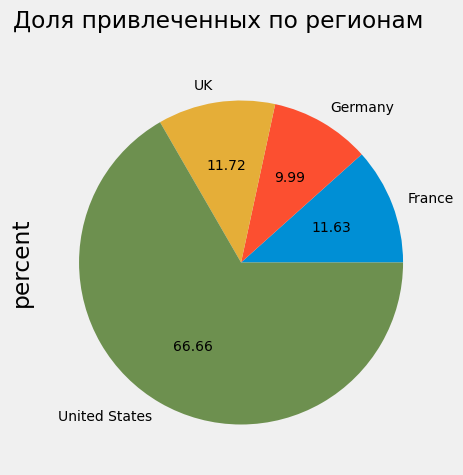

In [21]:
region = pd.DataFrame()
region['users_ammount'] = profiles.groupby('region')['user_id'].count()
region['percent'] = ((region['users_ammount']/profiles['region'].count())*100)
region.sort_values(by = 'percent', ascending=False)
plt.style.use("fivethirtyeight")
reg_int = region['percent'].plot(kind='pie', subplots=True, figsize=(15,5), 
                            autopct="%.2f", fontsize=10, legend = False, 
                            title = 'Доля привлеченных по регионам');


Судя по всему приложение пользуется популярностью в США и только одна треть привлеченных приходится на страны Европы. В целом понятно, на какую аудиторию рассчитано Procrastinate Pro+.

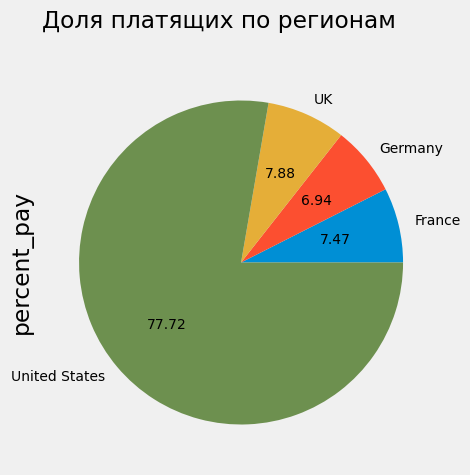

In [22]:
region_pay = pd.DataFrame()
region_pay['users_pay'] = profiles.query('payer == True').groupby('region')['user_id'].count()
region_pay['percent_pay'] = ((region_pay['users_pay'] / profiles.query('payer == True')['region'].count()) * 100)
region_pay.sort_values(by='percent_pay', ascending=False)
plt.style.use("fivethirtyeight")
reg_pay = region_pay['percent_pay'].plot(kind='pie', subplots=True, figsize=(15,5),
                            autopct="%.2f", fontsize=10, legend = False, 
                            title = 'Доля платящих по регионам');

Объединим полученные данные в одну таблицу для наглядности:

In [23]:
total_region = region.merge(region_pay, on = ['region'], how = 'left')
total_region.sort_values(by='percent', ascending=False)

users_ammount    percent  users_pay  percent_pay
region                                                         
United States         100002  66.664445       6902    77.716473
UK                     17575  11.716042        700     7.881995
France                 17450  11.632713        663     7.465376
Germany                14981   9.986801        616     6.936156

77.72% платящих из США! И меньше 1/4 из 3 стран Европы в сумме... 

Оценим долю платящих по каждому сегменту:

In [24]:
pay_users_region = pd.DataFrame()
pay_users_region['users_ammount'] = profiles.groupby('region')['user_id'].count()
pay_users_region['pay_users'] = profiles.query('payer == True').groupby('region')['user_id'].count()
pay_users_region['share_pay'] = (pay_users_region['pay_users']/pay_users_region['users_ammount'])*100
display(pay_users_region.sort_values(by='share_pay', ascending=False))

users_ammount  pay_users  share_pay
region                                            
United States         100002       6902   6.901862
Germany                14981        616   4.111875
UK                     17575        700   3.982930
France                 17450        663   3.799427

#### Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

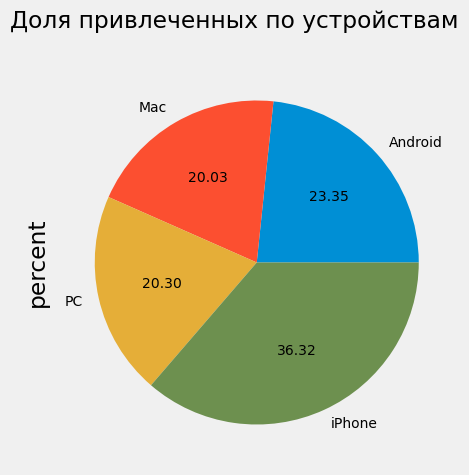

In [25]:
devices = pd.DataFrame()
devices['users_ammount'] = profiles.groupby('device')['user_id'].count() 
devices['percent'] = ((devices['users_ammount']/profiles['device'].count())*100)
devices.sort_values(by='percent', ascending=False)
plt.style.use("fivethirtyeight")
dev_int = devices['percent'].plot(kind='pie', subplots=True, figsize=(15,5),
                                 autopct="%.2f", fontsize=10, legend = False, 
                                 title = 'Доля привлеченных по устройствам');

По сравнению с данными со странами здесь доля распределена более равномерно. Оно и понятно: этими платформами пользуются люди со всего мира. Лидирует, конечно, iPhone. Интересно, доля людей с iPhonами в Америке такая же, как во всем остальном мире или американцы предпочитают свои разработки всем остальным платформам?

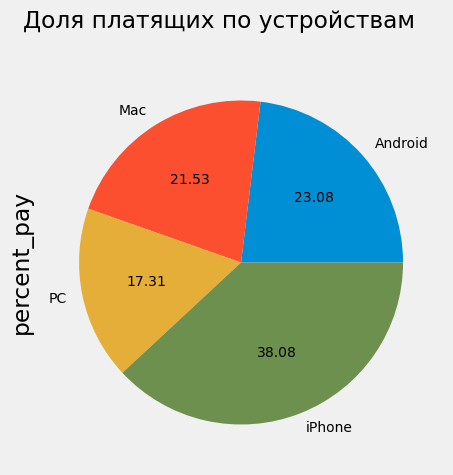

In [26]:
devices_pay = pd.DataFrame()
devices_pay['users_pay'] = profiles.query('payer == True').groupby('device')['user_id'].count() 
devices_pay['percent_pay'] = ((devices_pay['users_pay']/profiles.query('payer==True')['device'].count())*100)
devices_pay.sort_values(by='percent_pay', ascending=False)
plt.style.use("fivethirtyeight")
dev_pay = devices_pay['percent_pay'].plot(kind='pie', subplots=True, figsize=(15,5),
                                 autopct="%.2f", fontsize=10, legend = False, 
                                 title = 'Доля платящих по устройствам');

Интересно, что процент платящих с PC ниже всех остальных. Хотя, если смотреть по доле привлеченных, с этой платформы интересовались продуктом больше, чем с Mac. Возможно, владельцы iPhone и Мас предпочитают приобретать продукты тех или иных разработчиков больше, чем представители с других платформ. iPhone и Mac так или иначе воспитывают в людях культуру капитализма, где за все нужно платить:) 

И это хорошо. По крайней мере для нашего приложения. 

Объединим полученные данные в одну таблицу для наглядности:

In [27]:
total_devices = devices.merge(devices_pay, on = ['device'], how = 'left')
total_devices.sort_values(by='percent', ascending=False)

users_ammount    percent  users_pay  percent_pay
device                                                   
iPhone           54479  36.317396       3382    38.081297
Android          35032  23.353421       2050    23.082986
PC               30455  20.302251       1537    17.306610
Mac              30042  20.026932       1912    21.529107

In [28]:
pay_users_devices = pd.DataFrame()
pay_users_devices['users_ammount'] = profiles.groupby('device')['user_id'].count()
pay_users_devices['pay_users'] = profiles.query('payer == True').groupby('device')['user_id'].count()
pay_users_devices['share_pay'] = (pay_users_devices['pay_users']/pay_users_devices['users_ammount'])*100
display(pay_users_devices.sort_values(by='share_pay', ascending=False))

users_ammount  pay_users  share_pay
device                                      
Mac              30042       1912   6.364423
iPhone           54479       3382   6.207897
Android          35032       2050   5.851793
PC               30455       1537   5.046790

#### Рекламные источники привлечения.

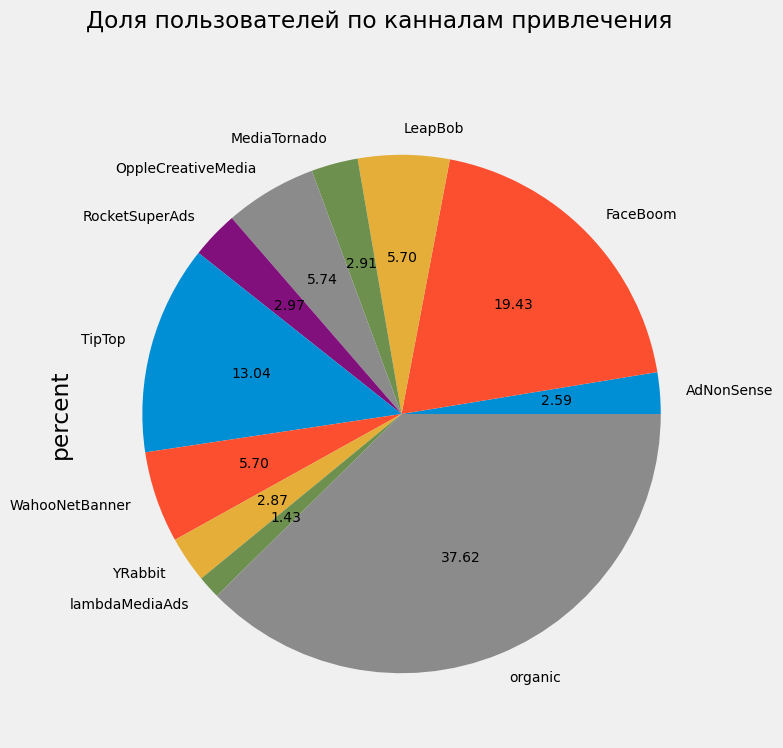

In [29]:
channels = pd.DataFrame()
channels['users'] = profiles.groupby('channel')['user_id'].count()
channels['percent'] = ((channels['users']/profiles['channel'].count())*100) 
channels.sort_values(by='percent', ascending=False)
plt.style.use("fivethirtyeight")
chan_int = channels['percent'].plot(kind='pie', subplots=True, figsize=(15,8),
                                 autopct="%.2f", fontsize=10, legend = False, 
                                 title = 'Доля пользователей по канналам привлечения');

Вау! Органических пользователей больше всего! Какие классные ребята! Далее идут TipTop и FaceBoom... 

Я не маркетолог, но...
Зачем так много каналов привлечения? Особенно с учетом того, что люди довольно часто сами приходят в приложение. Посмотрим дальше на окупаемость

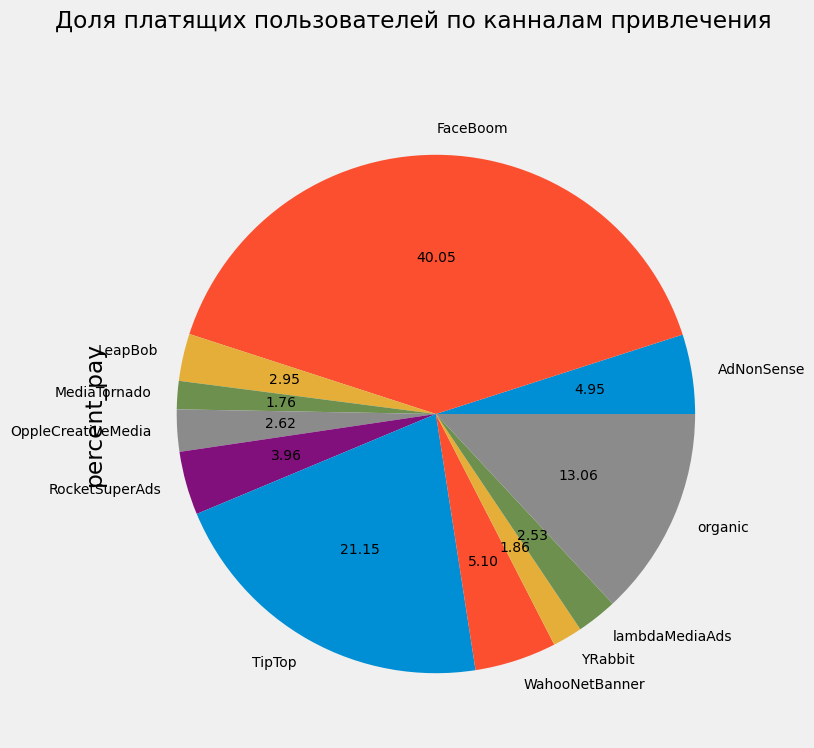

In [30]:
channels_pay = pd.DataFrame()
channels_pay['users_pay'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
channels_pay['percent_pay'] = ((channels_pay['users_pay']/profiles.query('payer == True')['channel'].count())*100) 
channels_pay.sort_values(by='percent_pay', ascending=False)
plt.style.use("fivethirtyeight")
chan_pay = channels_pay['percent_pay'].plot(kind='pie', subplots=True, figsize=(15,8),
                                 autopct="%.2f", fontsize=10, legend = False, 
                                 title = 'Доля платящих пользователей по канналам привлечения');

"Органические" пользователи приобретают продукты меньше, чем два наших лидирующих канала TipTop и FaceBoom, но они все равно остаются на лидирующих позициях. Далее идут WahooNetBanner и AdNonSense. 

Объединим полученные данные в одну таблицу для наглядности:

In [31]:
channels_total = channels.merge(channels_pay, on = ['channel'], how = 'left')
channels_total.sort_values(by='percent_pay', ascending=False)

users    percent  users_pay  percent_pay
channel                                                     
FaceBoom            29144  19.428297       3557    40.051796
TipTop              19561  13.039971       1878    21.146267
organic             56439  37.623993       1160    13.061592
WahooNetBanner       8553   5.701696        453     5.100777
AdNonSense           3880   2.586529        440     4.954397
RocketSuperAds       4448   2.965175        352     3.963518
LeapBob              8553   5.701696        262     2.950118
OppleCreativeMedia   8605   5.736361        233     2.623578
lambdaMediaAds       2149   1.432590        225     2.533498
YRabbit              4312   2.874513        165     1.857899
MediaTornado         4364   2.909178        156     1.756559

Оценим долю платящих по каждому сегменту:

In [32]:
pay_users_channels = pd.DataFrame()
pay_users_channels['users_ammount'] = profiles.groupby('channel')['user_id'].count()
pay_users_channels['pay_users'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
pay_users_channels['share_pay'] = (pay_users_channels['pay_users']/pay_users_channels['users_ammount'])*100
display(pay_users_channels.sort_values(by='share_pay', ascending=False))

users_ammount  pay_users  share_pay
channel                                                
FaceBoom                    29144       3557  12.204914
AdNonSense                   3880        440  11.340206
lambdaMediaAds               2149        225  10.469986
TipTop                      19561       1878   9.600736
RocketSuperAds               4448        352   7.913669
WahooNetBanner               8553        453   5.296387
YRabbit                      4312        165   3.826531
MediaTornado                 4364        156   3.574702
LeapBob                      8553        262   3.063253
OppleCreativeMedia           8605        233   2.707728
organic                     56439       1160   2.055316

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Общая сумма расходов на маркетинг и распределение трат по рекламным источникам.

In [33]:
#costs.info()

Общая сумма расходов на маркетинг с разбивкой по каналам:

In [34]:
costs_sum = costs['costs'].sum()
costs_sum_channel = pd.DataFrame()
costs_sum_channel['sum_costs'] = costs.groupby('channel')['costs'].sum()
display(costs_sum_channel.sort_values(by='sum_costs', ascending=False))
print('Общая сумма расходов на маркетинг:{}'.format(costs_sum))

sum_costs
channel                      
TipTop               54751.30
FaceBoom             32445.60
WahooNetBanner        5151.00
AdNonSense            3911.25
OppleCreativeMedia    2151.25
RocketSuperAds        1833.00
LeapBob               1797.60
lambdaMediaAds        1557.60
MediaTornado           954.48
YRabbit                944.22

Общая сумма расходов на маркетинг:105497.30000000002


Исходя из предыдущих показателей, TipTop явно несколько не дорабатывает в сравнении с FaceBoom. Но, даже если не делать замечания в адрес TipTop, можно было бы уже отмести часть каналов, которые приносят не так много платящих пользователей. Но окупаемость мы еще сможем посмотреть чуть позже. 

#### Визуализацию динамики изменения расходов во времени (по неделям и месяцам).

Общая визуализация для всех источников:

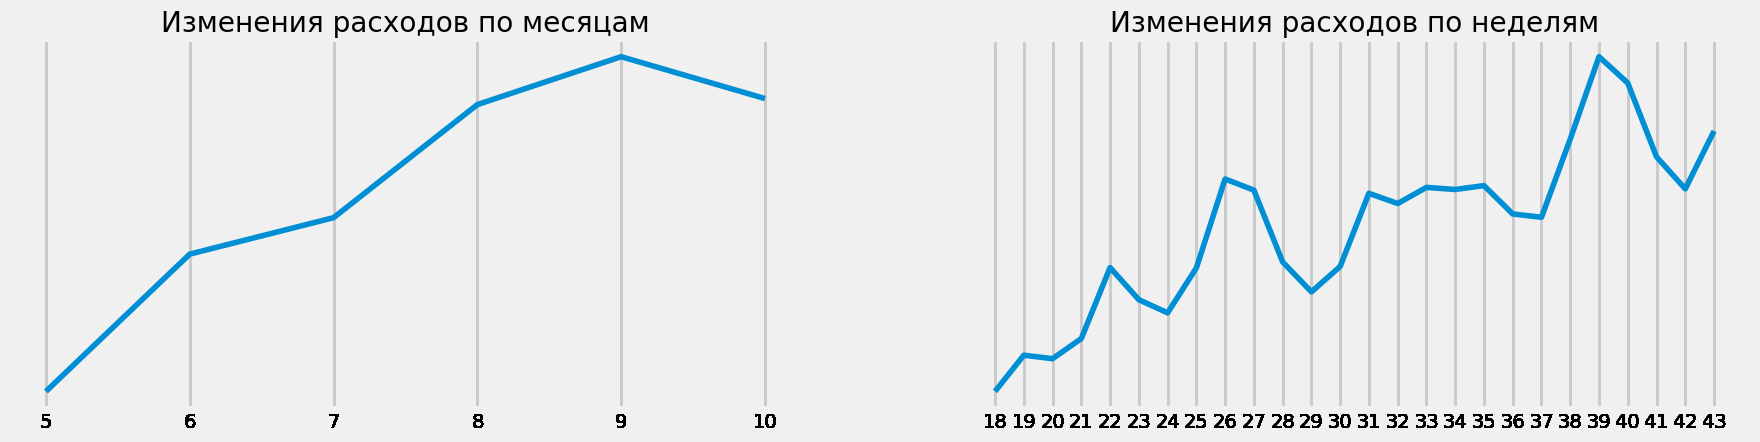

In [35]:
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week


costs_m = costs.groupby('month')['costs'].sum()
costs_w = costs.groupby('week')['costs'].sum()

plt.style.use("fivethirtyeight")


fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax1.set(title = 'Изменения расходов по месяцам', xticks=list(costs['month']), yticks=list(costs['costs']))
ax2.set(title = 'Изменения расходов по неделям', xticks=list(costs['week']), yticks=list(costs['costs']))
ax1.plot(costs_m)
ax2.plot(costs_w)



Похоже, большая часть расходов на рекламу производится в начале месяца. Расходы на рекламу явно растут в довольно больших масштабах. 

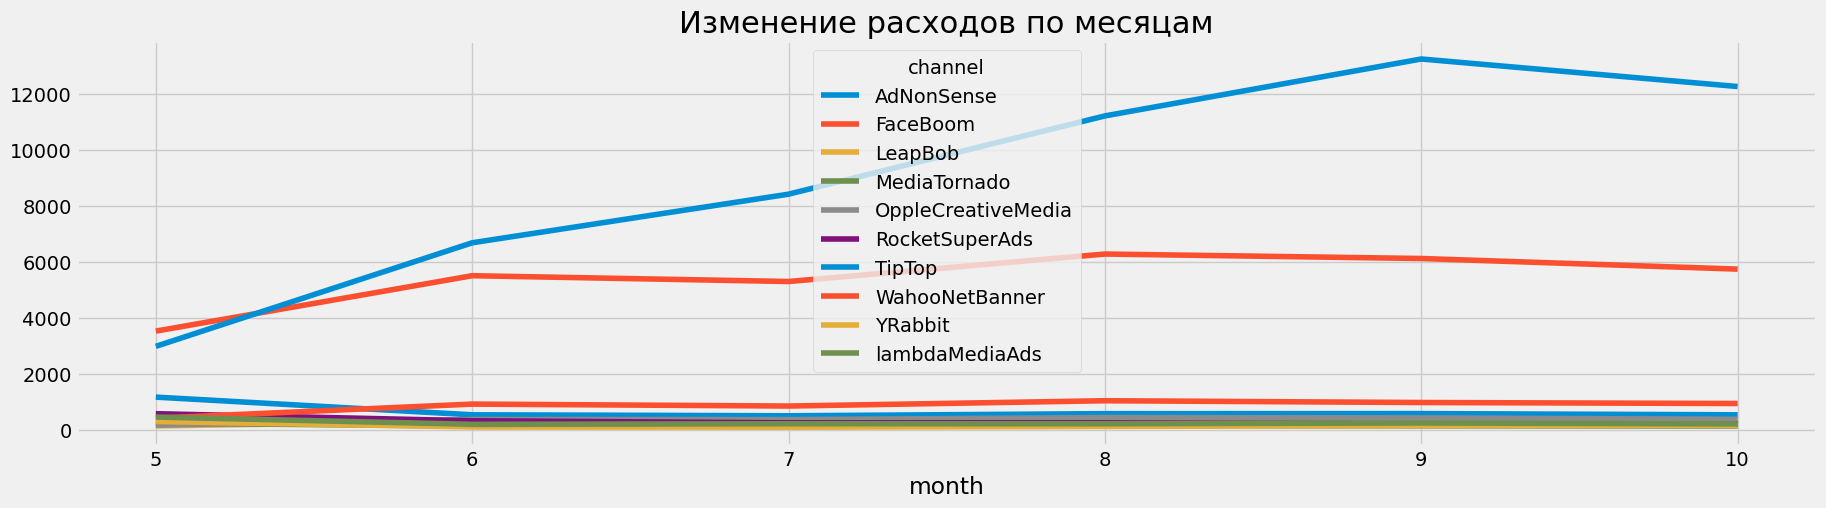

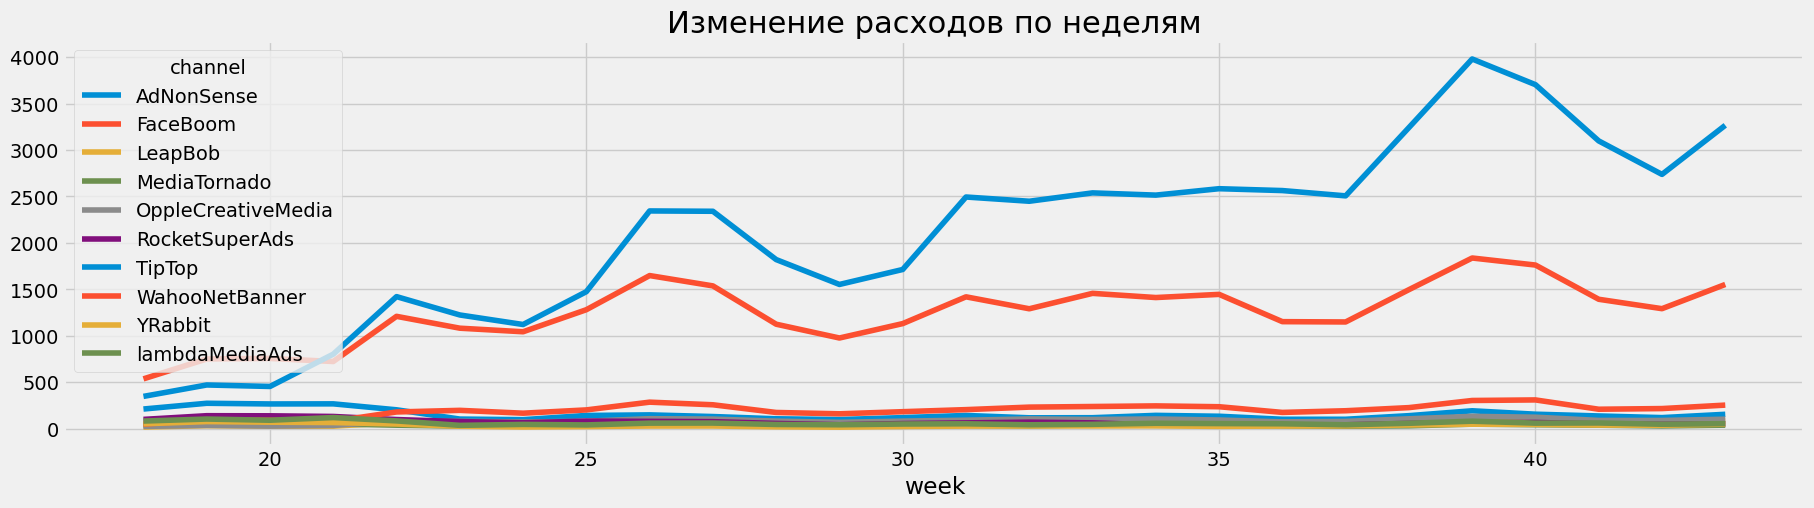

In [36]:
df1 = costs.pivot_table(index='month', columns ='channel', values = 'costs', aggfunc='sum')
df2 = costs.pivot_table(index='week', columns ='channel', values = 'costs', aggfunc='sum')

plt1 = df1.plot(figsize=(20,5))
plt2 = df2.plot(figsize=(20,5))

plt1.set_title('Изменение расходов по месяцам', fontsize = 22);
plt2.set_title('Изменение расходов по неделям', fontsize = 22);

Как и наблюдалось ранее, расход на TipTop больше, чем на все остальное. При этом на других каналах расход распределен более равномерно. Если учитывать наблюдения по привлечению пользователей, то TipTop находится на втором месте по привлечению после FaceBoom. Наверное, можно было бы сократить расход на рекламе в TipTop в два раза и сосредоточиться на FaceBoom. А по другим каналам пока непонятно, насколько их испльзование вообще необходимо. 

In [37]:
mean_acquisition_cost = pd.DataFrame()
mean_acquisition_cost['mean_cost'] = profiles.groupby('channel')['acquisition_cost'].mean()
display(mean_acquisition_cost.sort_values(by='mean_cost', ascending=False))
total_mean = profiles['acquisition_cost'].mean()
print('Cредний CAC по всему датафрейму: {}'.format(total_mean))

mean_cost
channel                      
TipTop               2.799003
FaceBoom             1.113286
AdNonSense           1.008054
lambdaMediaAds       0.724802
WahooNetBanner       0.602245
RocketSuperAds       0.412095
OppleCreativeMedia   0.250000
YRabbit              0.218975
MediaTornado         0.218717
LeapBob              0.210172
organic              0.000000

Cредний CAC по всему датафрейму: 0.7032778251827625


### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [38]:
profiles = profiles[profiles['channel'] != 'organic']

In [39]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

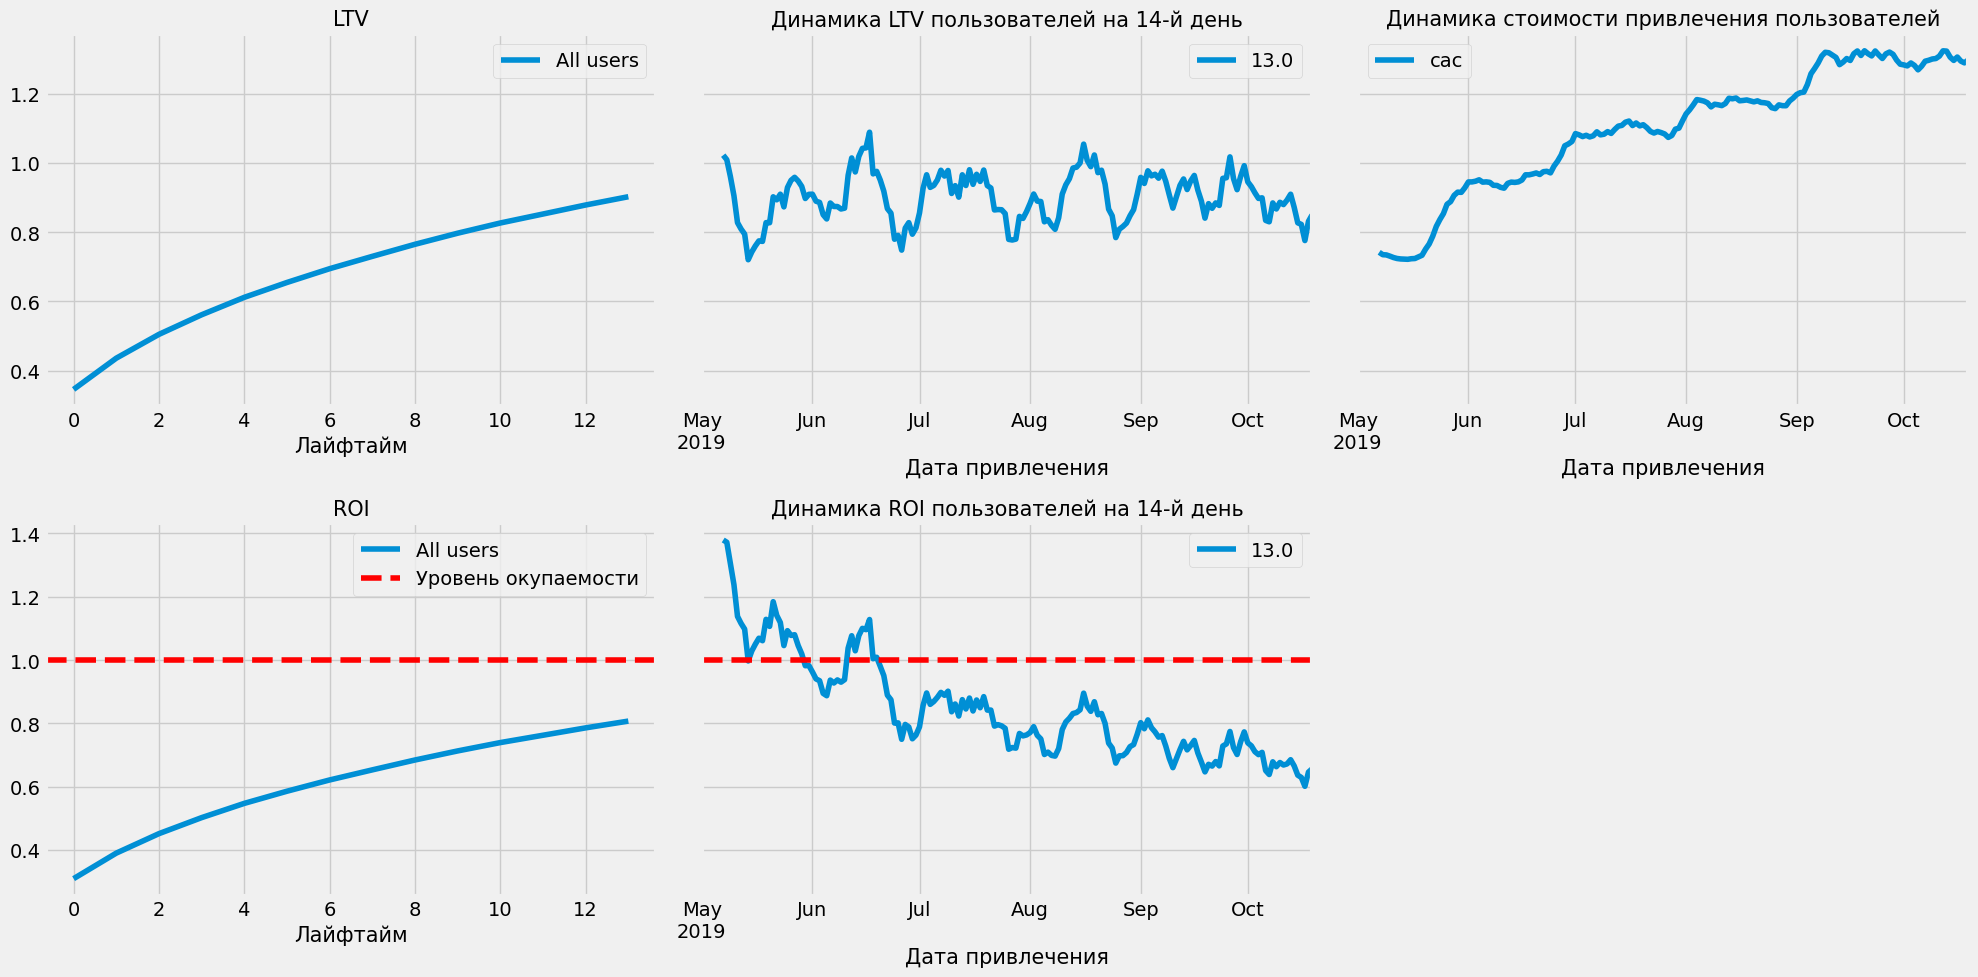

In [40]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

LTV плавно растет и пытается достигнуть 1. Это хорошо. LTV в норме.

В июне резко возрасла стоимость привлечения. Судя по графикам в начале июня это действительно помогло найти заинтересованных пользователей. 

Судя по всему реклама окупается к концу второй недели. ROI к середине горизонта анализа - 80%.


Реклама резко упала по окупаемости после июня. Оно и понятно. Массовые вложения в рекламу начали происходить после начала июня. Нельзя сказать, что это не помогло, потому что по графику "Динамики LTV" можно заметить прирост пользователей в это же время. Однако, вернувшись к графику динамики ROI мы можем заметить, что после середины июля окупаемость резко пошла на спад, а стоимость привлечения начала все больше и больше расти. 

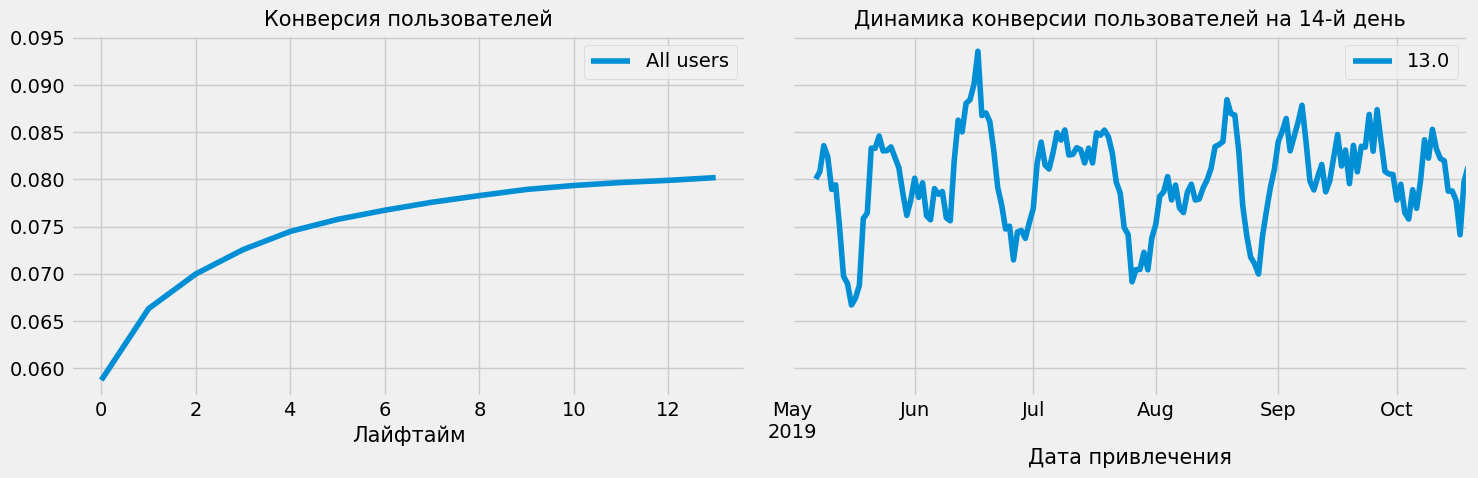

In [41]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=[]
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

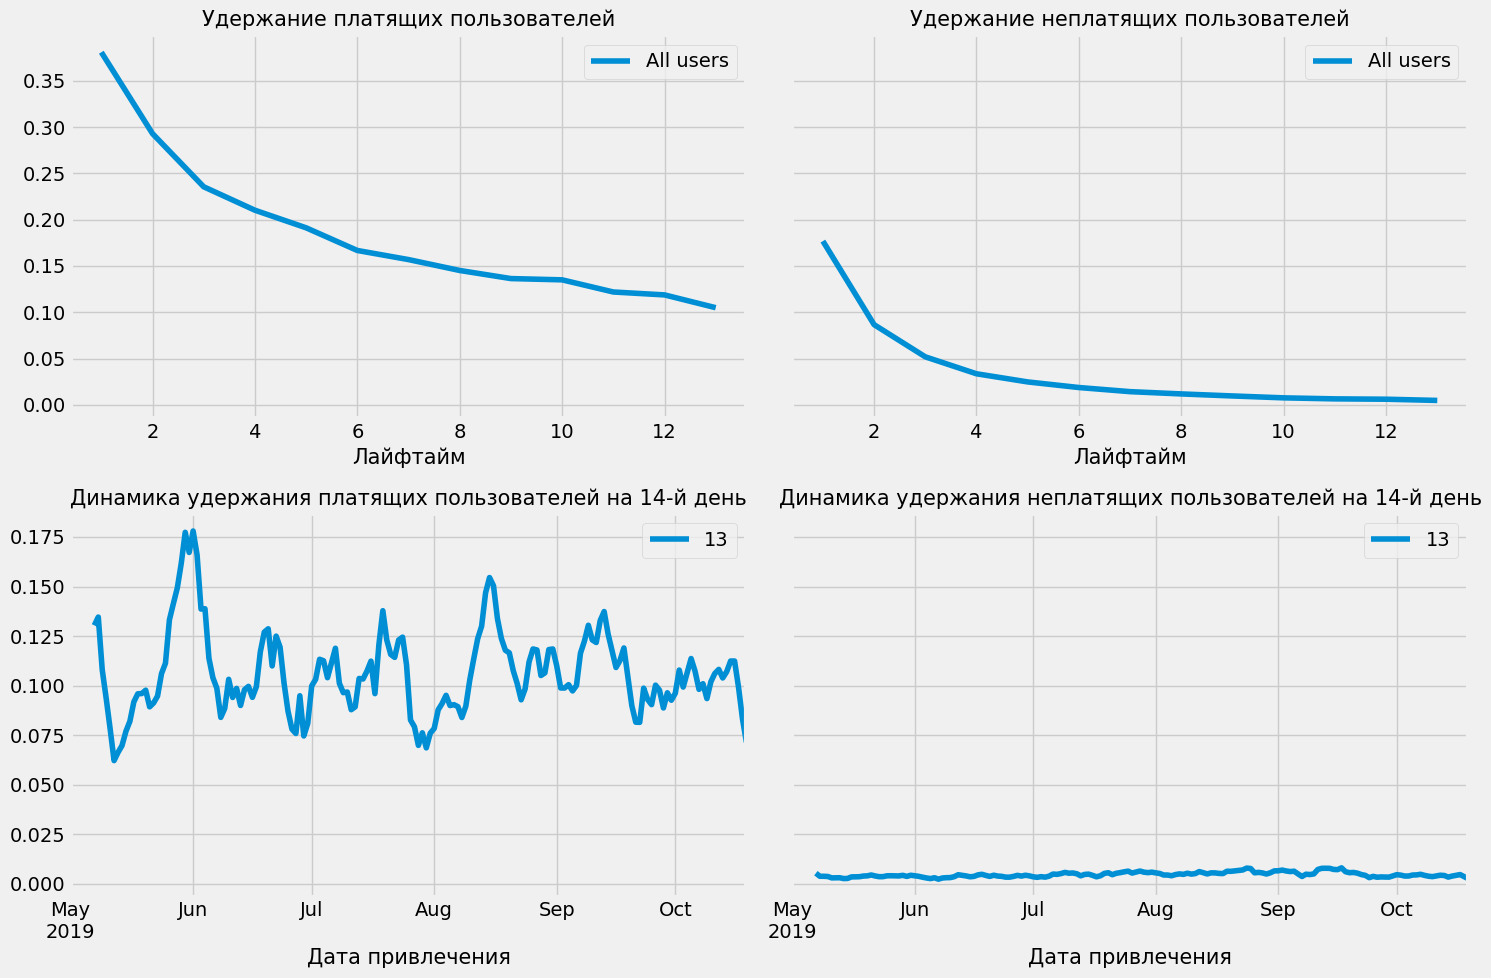

In [42]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=[]
)

plot_retention(retention_grouped, retention_history, horizon_days) 

По этим данным конверсии и удержания нельзя сделать конкретных выводов, только то, что все выглядит так, как будто бы все показатели в норме. Рассмотрим "под микроскопом". 

Ну и опять-таки можно сделать вывод, что шаг по увелечению вложений в рекламу в июне был вполне оправдан. Но пока что выглядит так, что с ней переусердствовали после. 

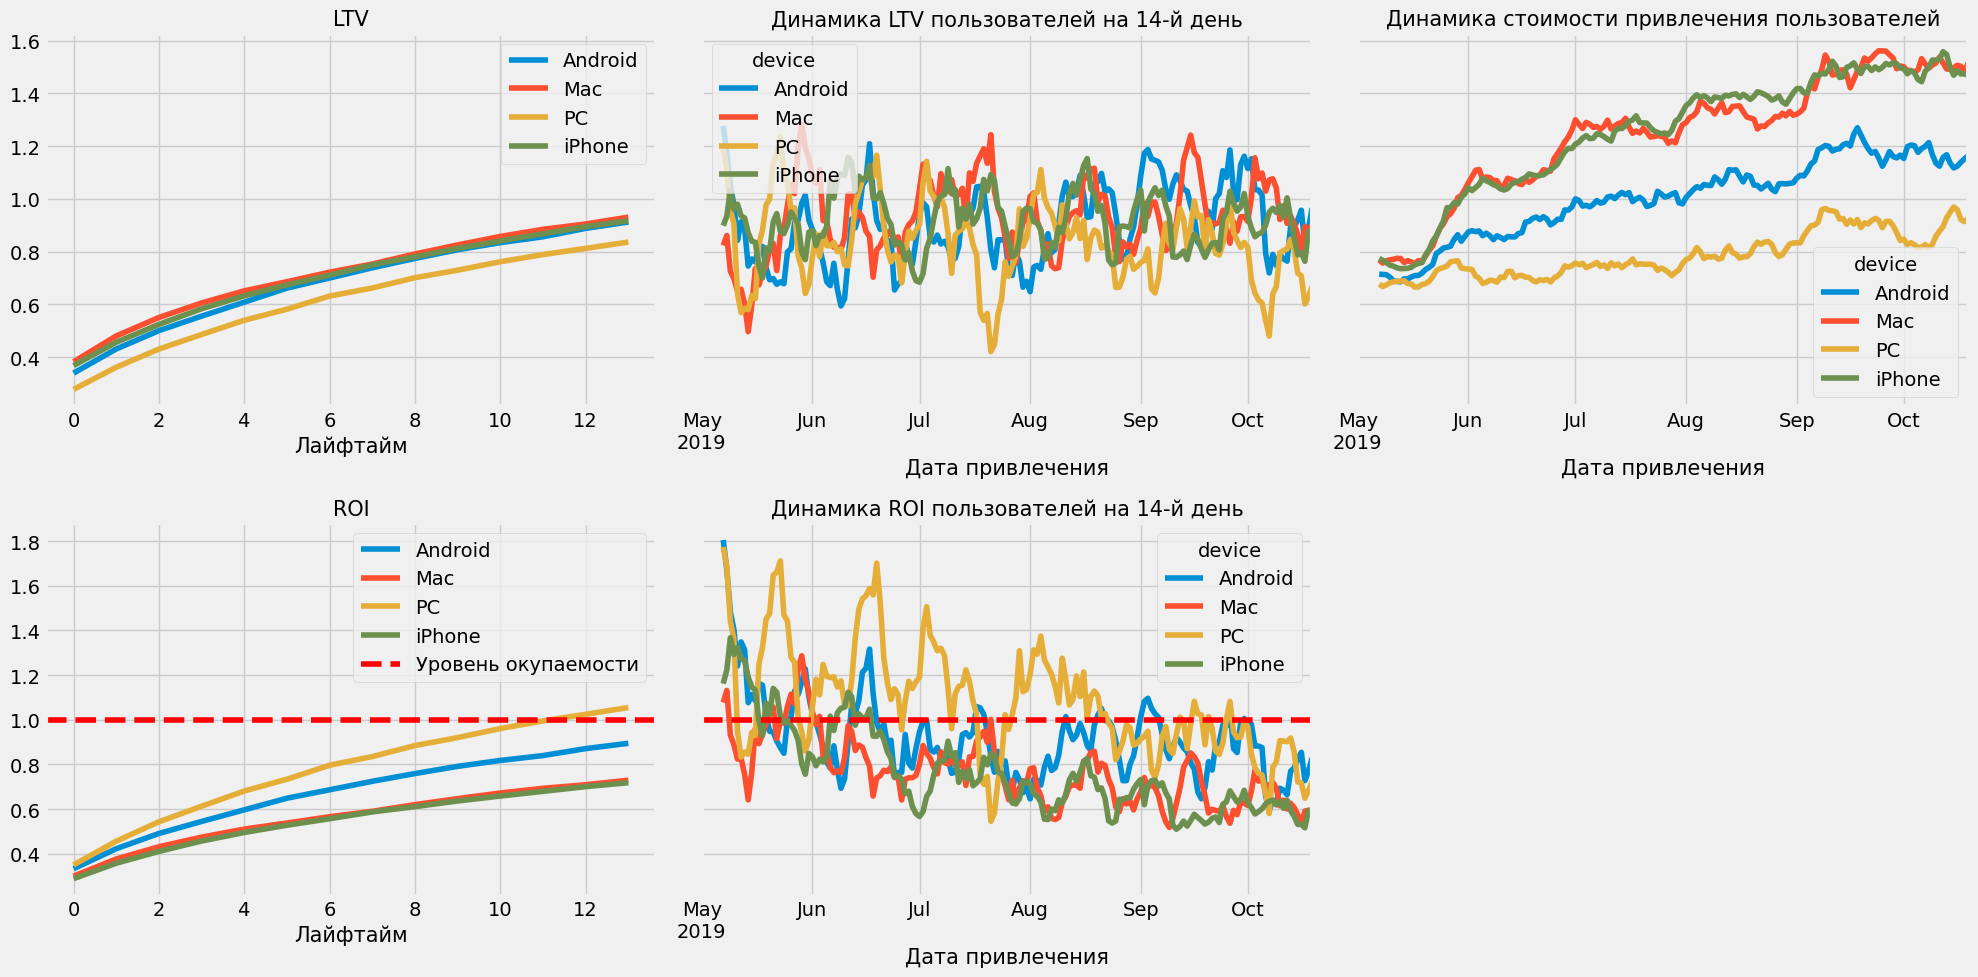

In [43]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Похоже, что вложения на рекламу стоит распределить более равномерно между устройствами. Из-за того, что доля платящих пользователей больше с Mac и iPhone, рекламные кампании начали проводить в большей степени на этих платформах, совершенно несправедливо недооценив PC и Android. Судя по графику ROI, окупаются в основном как раз платформы PC и Android.

Возможно, исключительно от неравномерного распределения рекламы по устройствам платящих пользователей с Mac и iPhone на 2-3 процента больше, но эти 2-3 процента не окупают рекламу. 

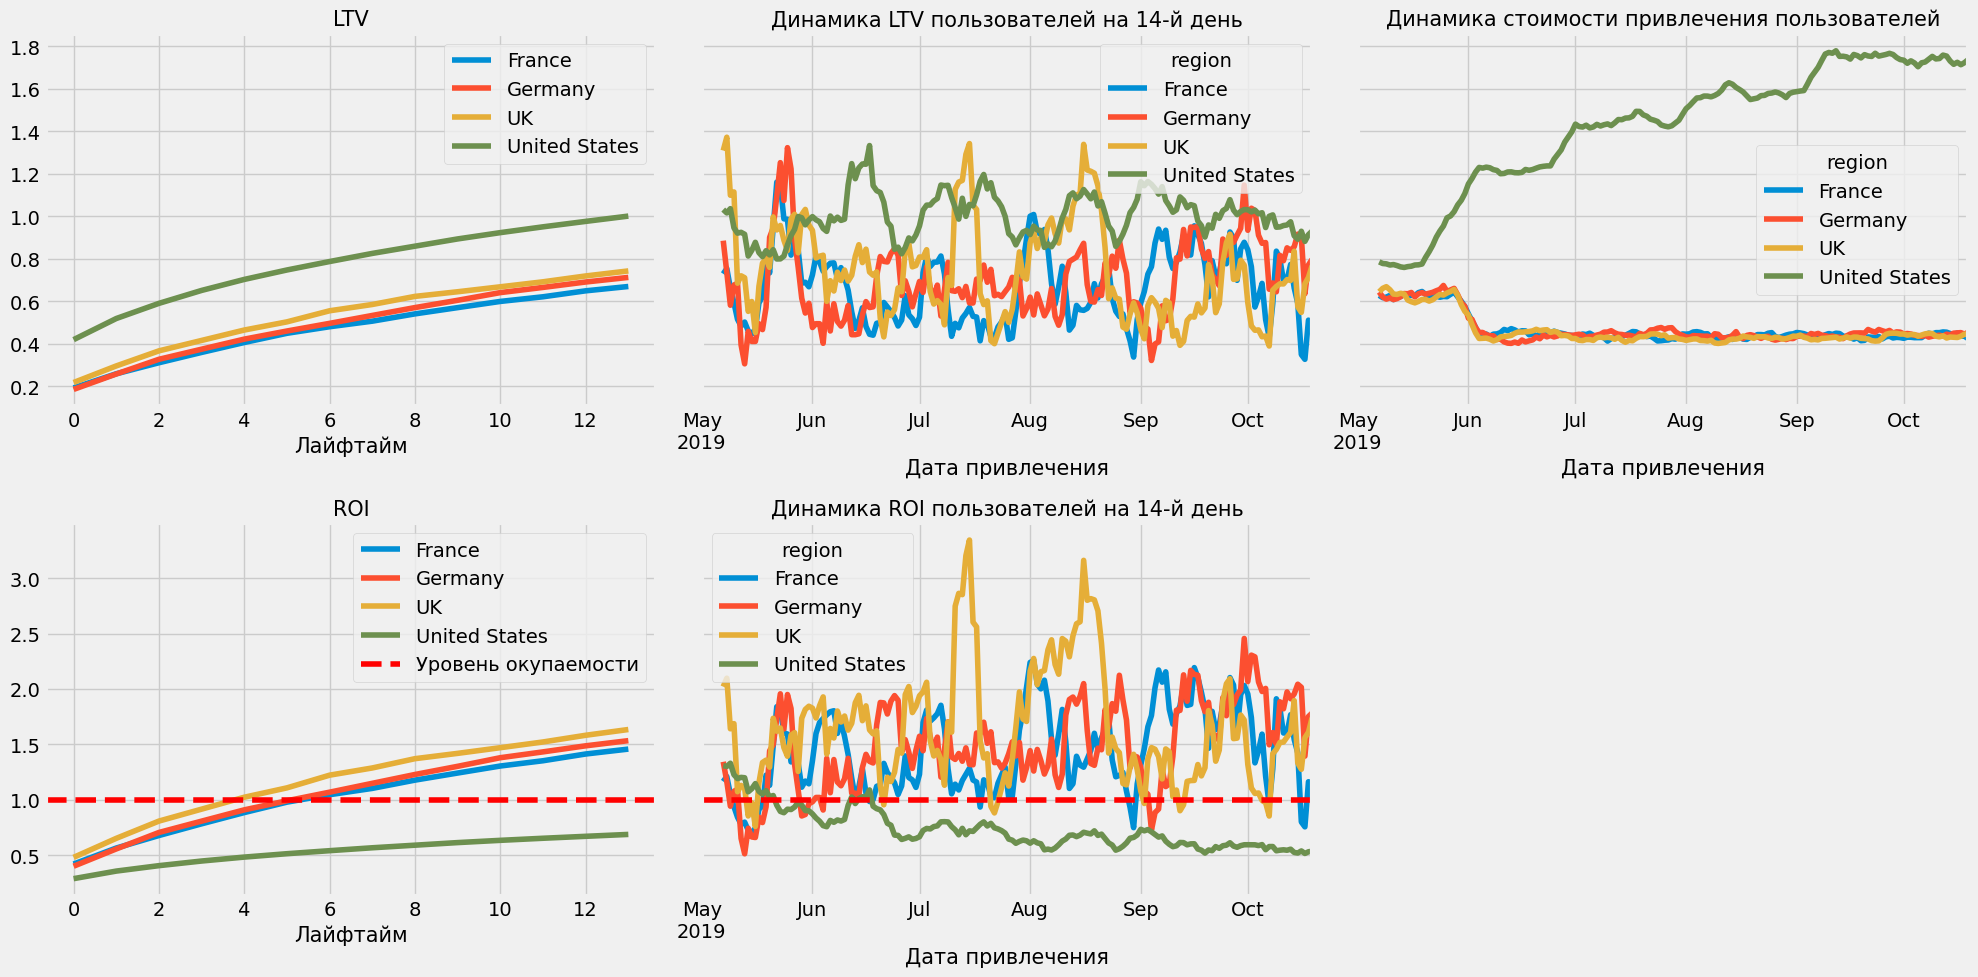

In [44]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 



А вот тут еще интереснее! Мы помним, что пользователей из США у нас больше всего. Затраты на рекламу с июня повысились в 4 раза в США. Но и окупаемость рекламы в сравнении с другими регионами упала в 1,5 раза! Больше затрат на рекламу = меньше окупаемость в данном случае. Хотя по динамики ЛТВ можно сделать вывод, чтоклиенты из США тратят в приложении довольно много, но не окупаемо.

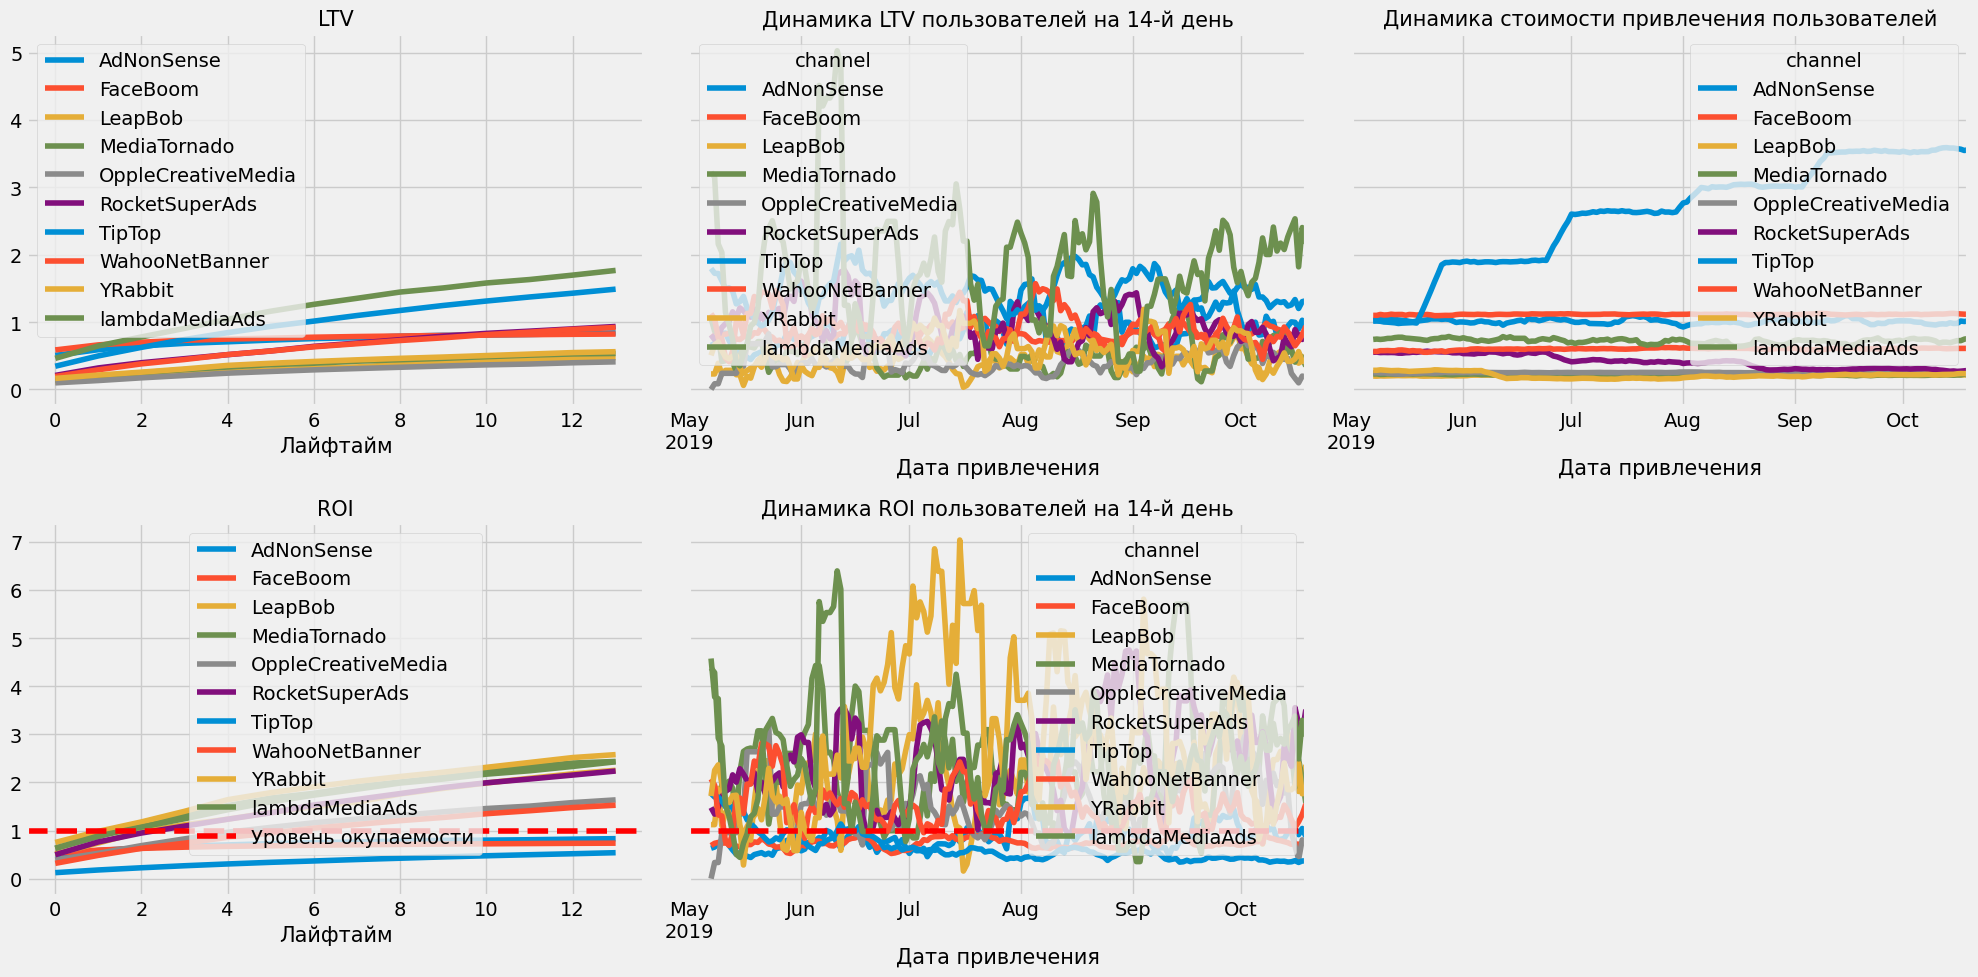

In [45]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Как здорово пляшут каналы на графике динамики ROI и LTV! Ничего не понятно!

Каналов очень много, разобью по самым дорогим и дешевым. 

In [46]:
profiles['channel'].unique()
first_five = ['FaceBoom', 'TipTop', 'AdNonSense', 'WahooNetBanner']
last_six = ['YRabbit', 'MediaTornado', 'RocketSuperAds', 'LeapBob','OppleCreativeMedia', 'lambdaMediaAds']

In [47]:
profiles_1 = profiles[profiles['channel'].isin(first_five)]
profiles_2 = profiles[profiles['channel'].isin(last_six)]

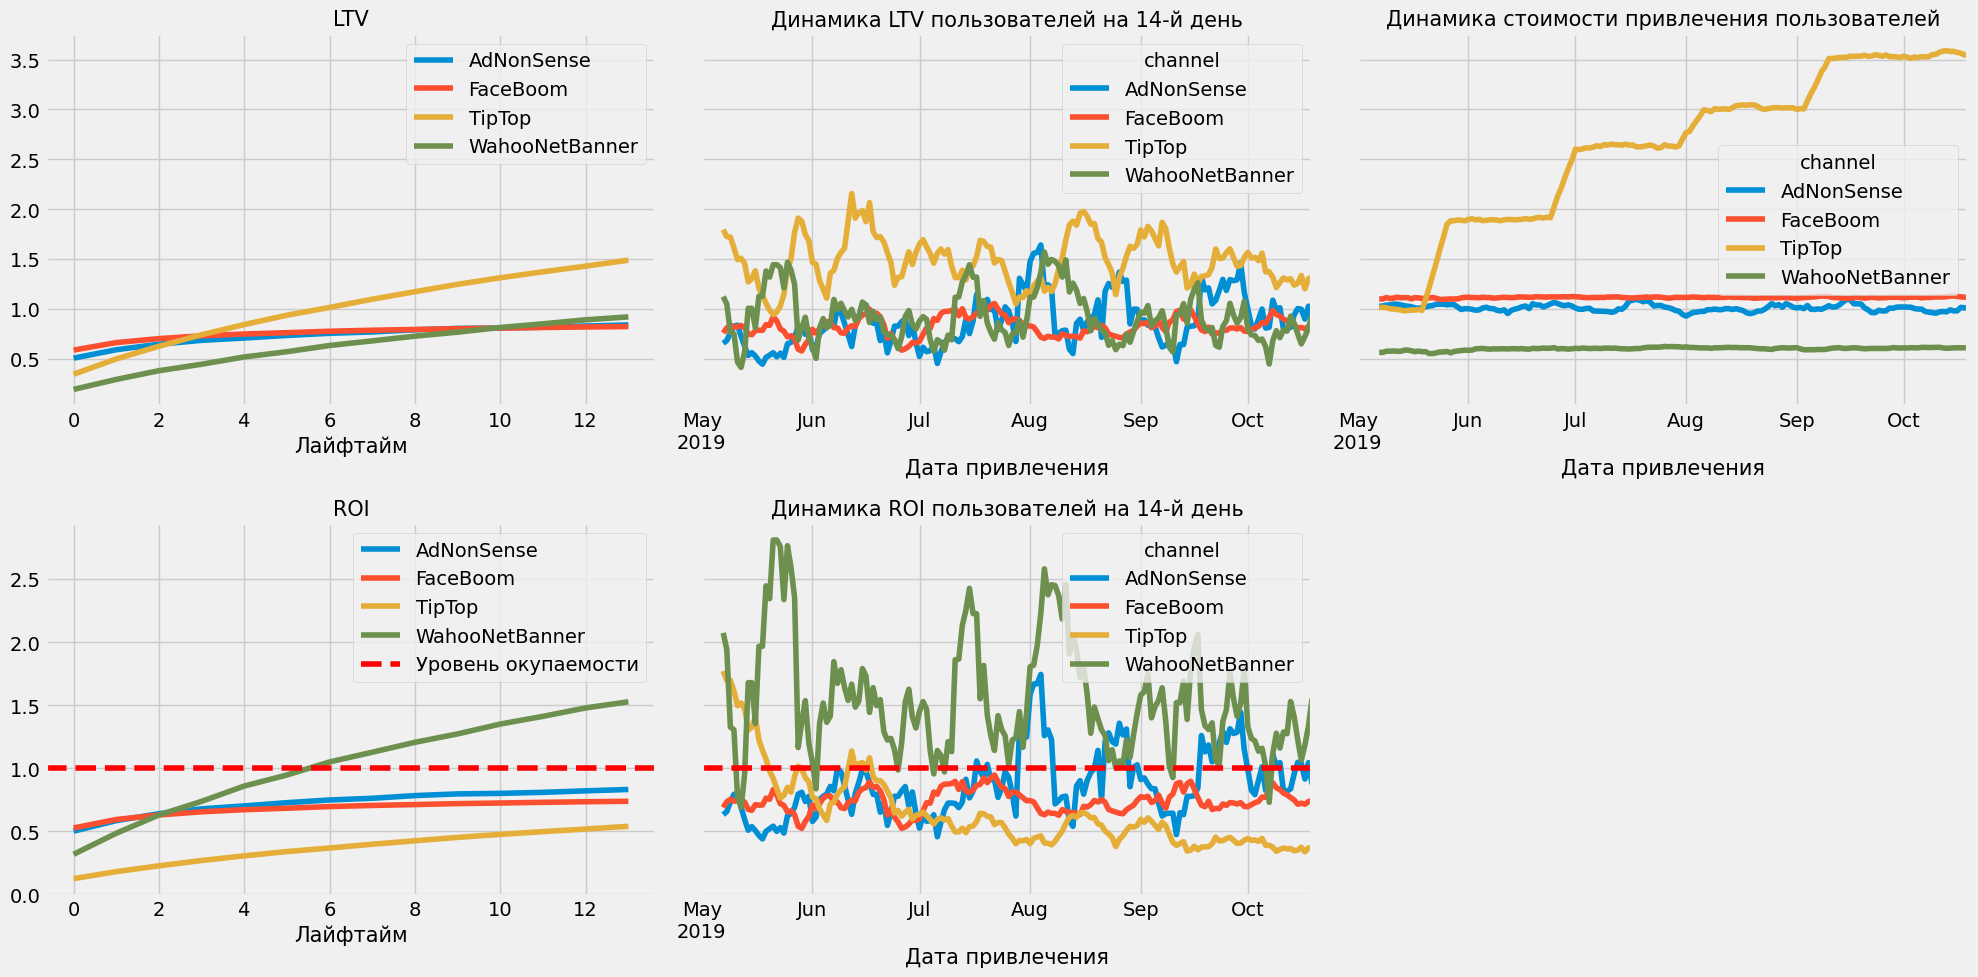

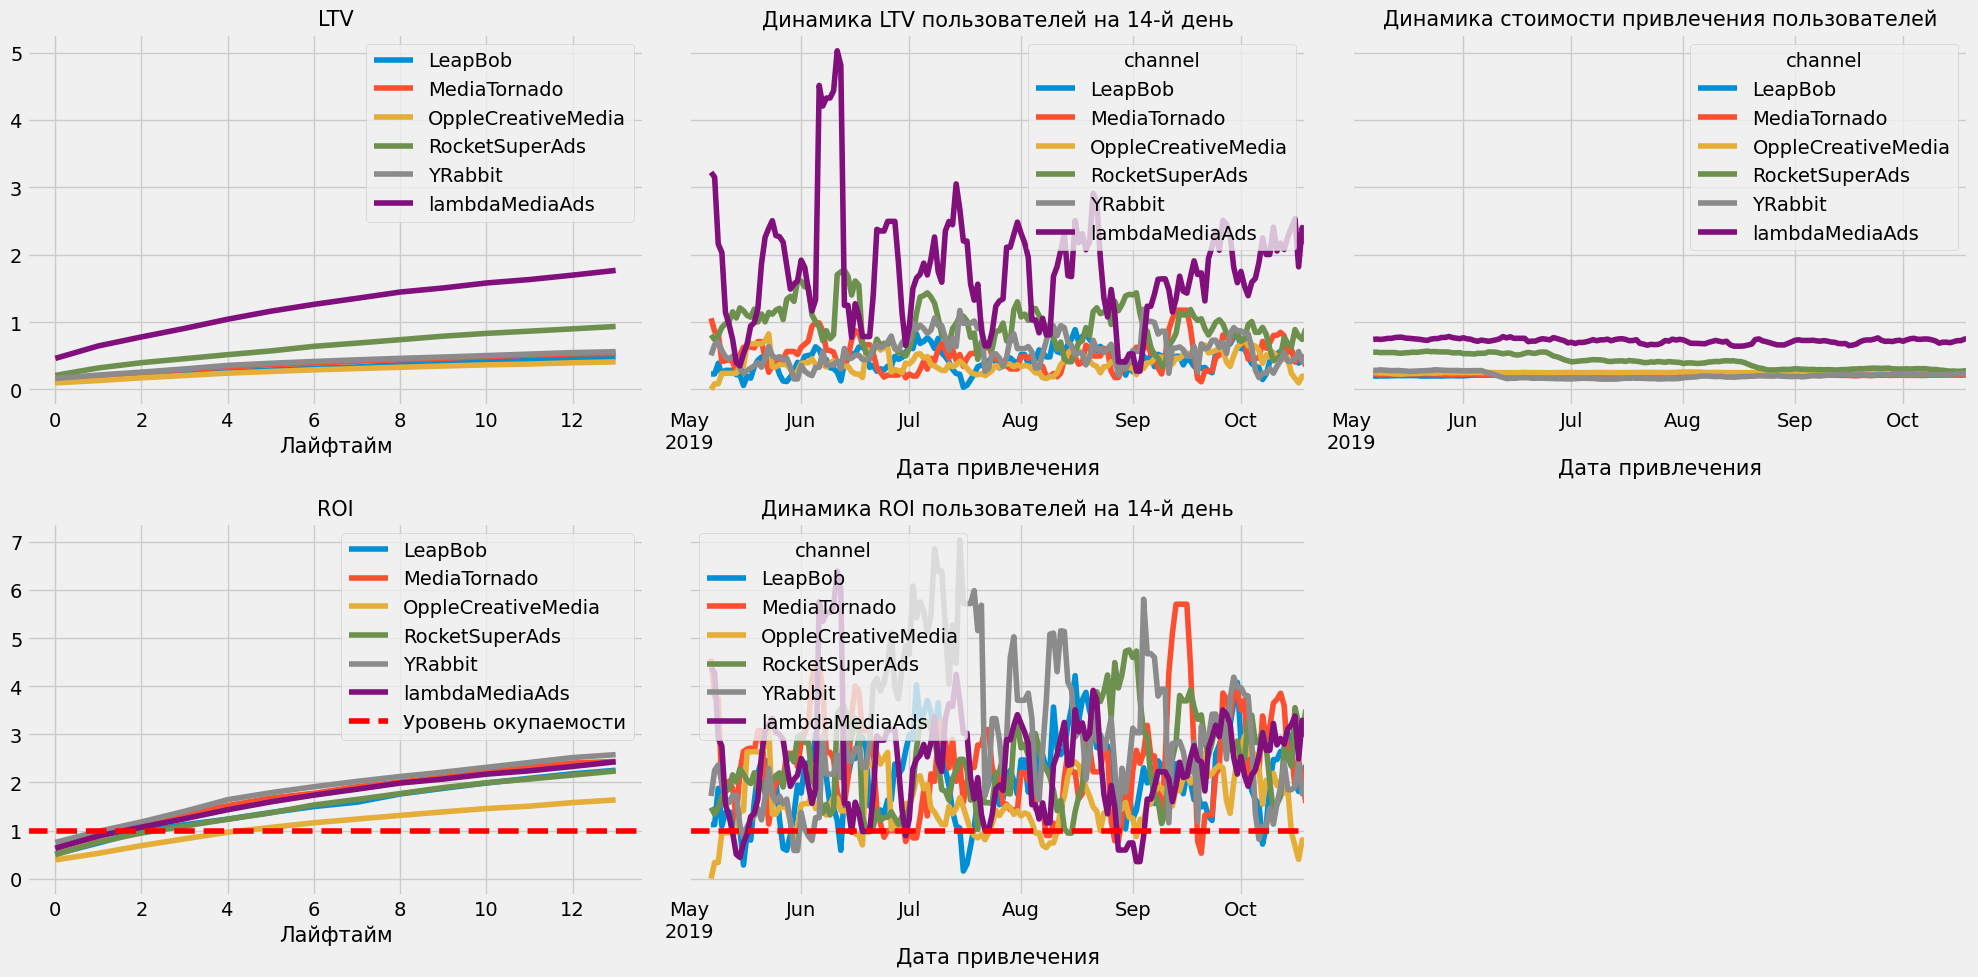

In [48]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_1, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_2, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Судя по всему TipTop работает на пределе своих возможностей. Скорее всего из-за того, что этот канал приносит большое количество платящих пользователей, туда решили вкладывать все деньги, чтобы привлечь больше пользователей... 

Но больше рекламы не = больше денег. 

Другие каналы, в которые вкладывается меньше средств справляются вполне хорошо. Но это не значит, что вместо TipTop стоит использовать одну из них или все. Для начала еще раз вглядимся в детали. 

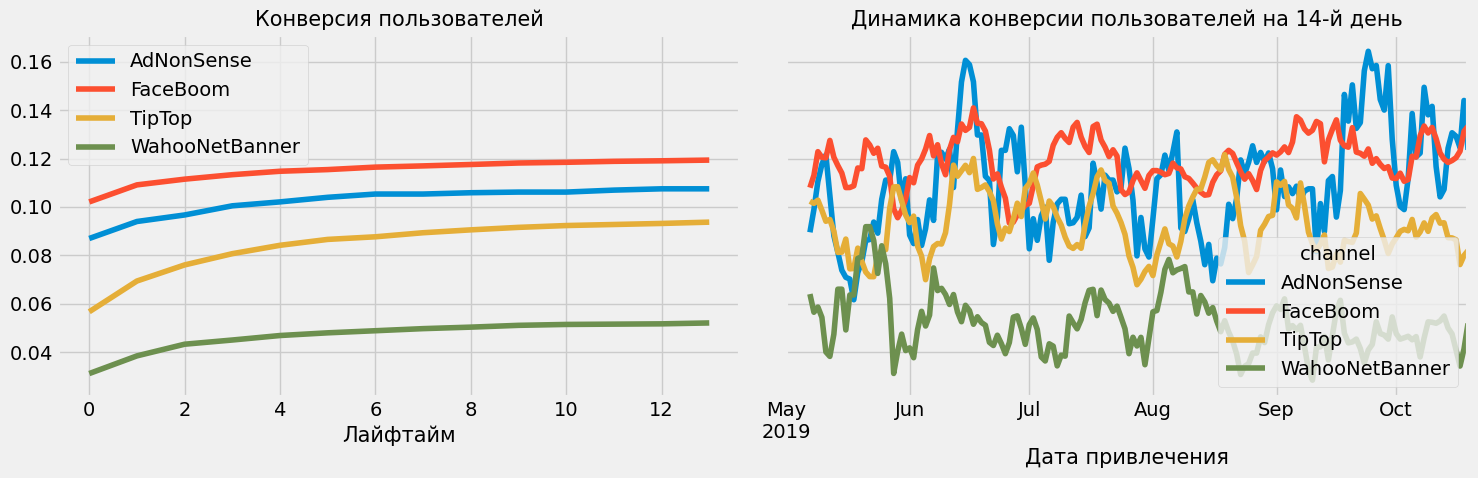

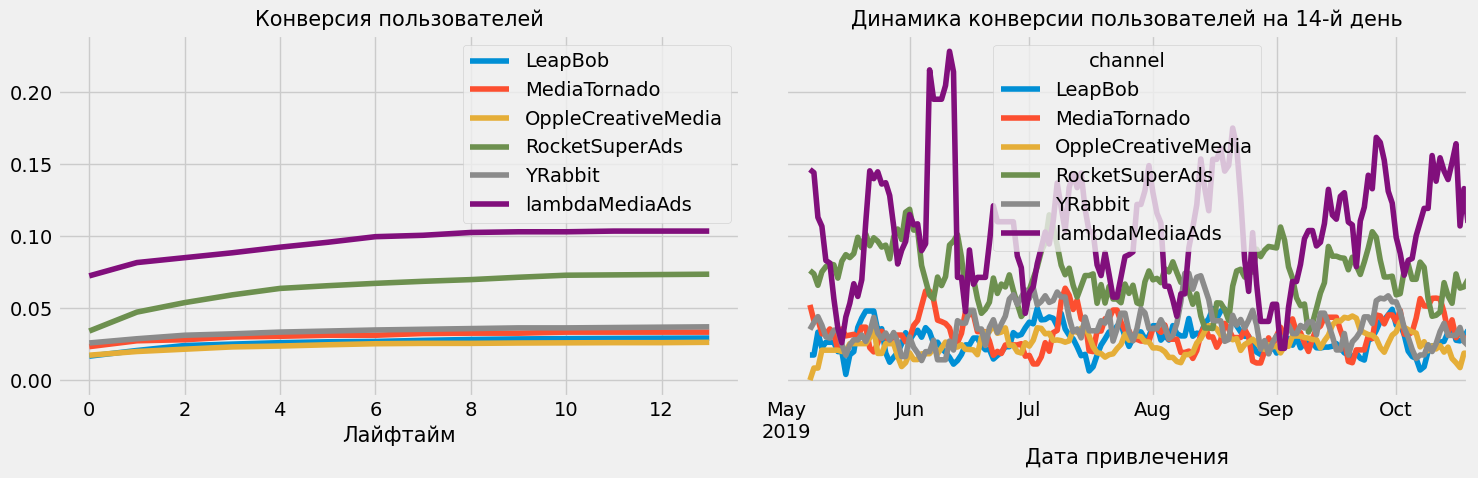

In [49]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_1, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_2, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей из неплатящих в платящие выше у Faceboom и AdNonSense. Однако в TipTop конверсия так же не на последнем месте.  

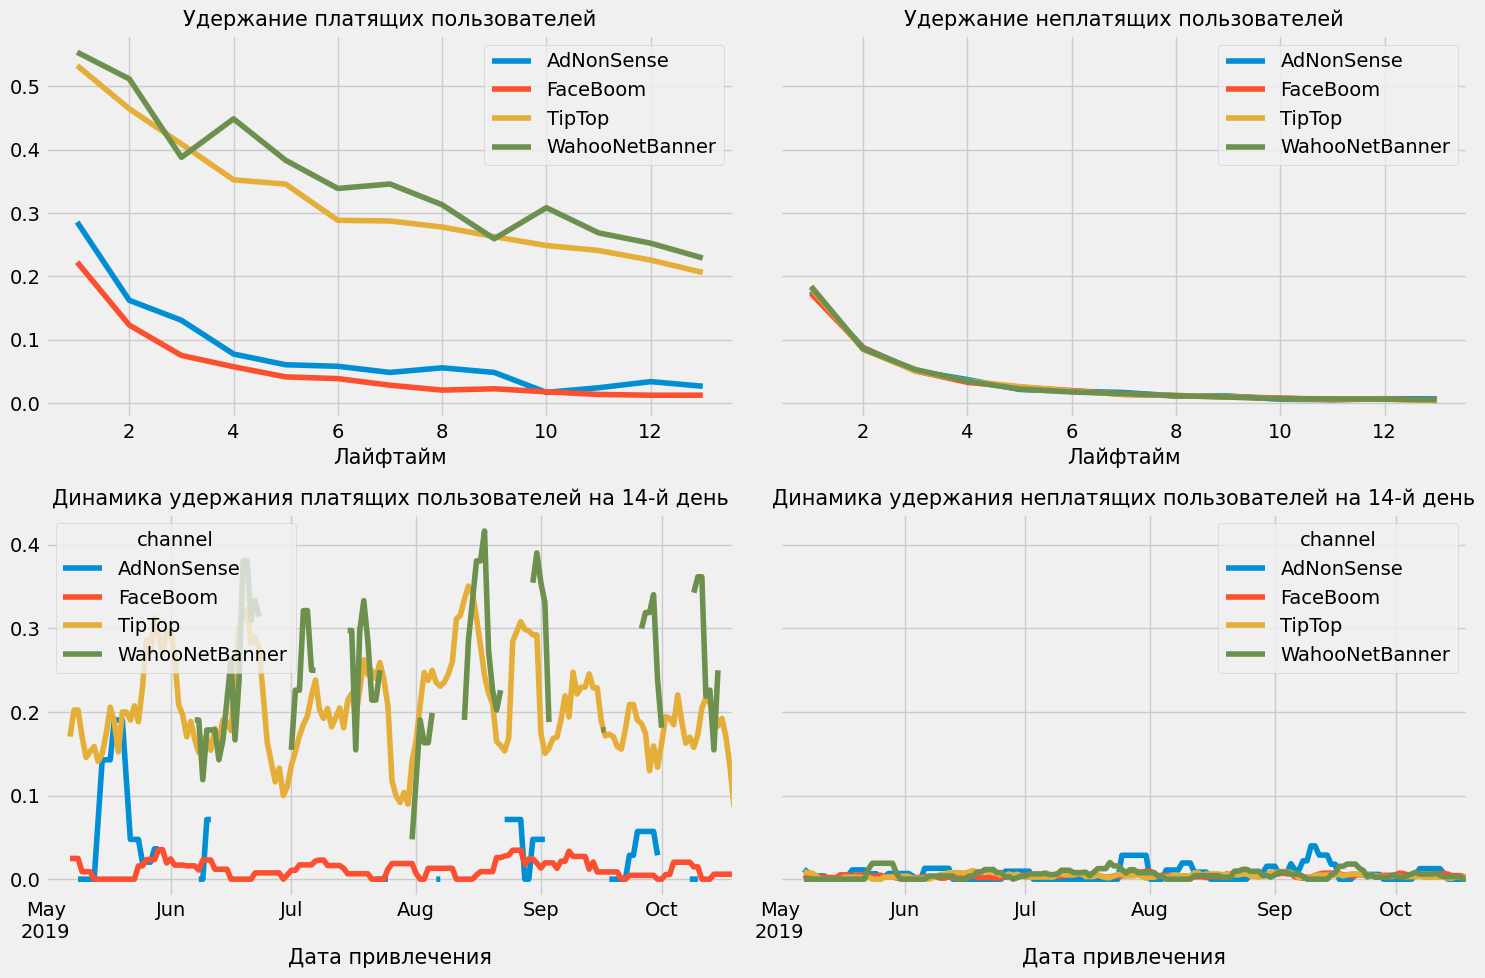

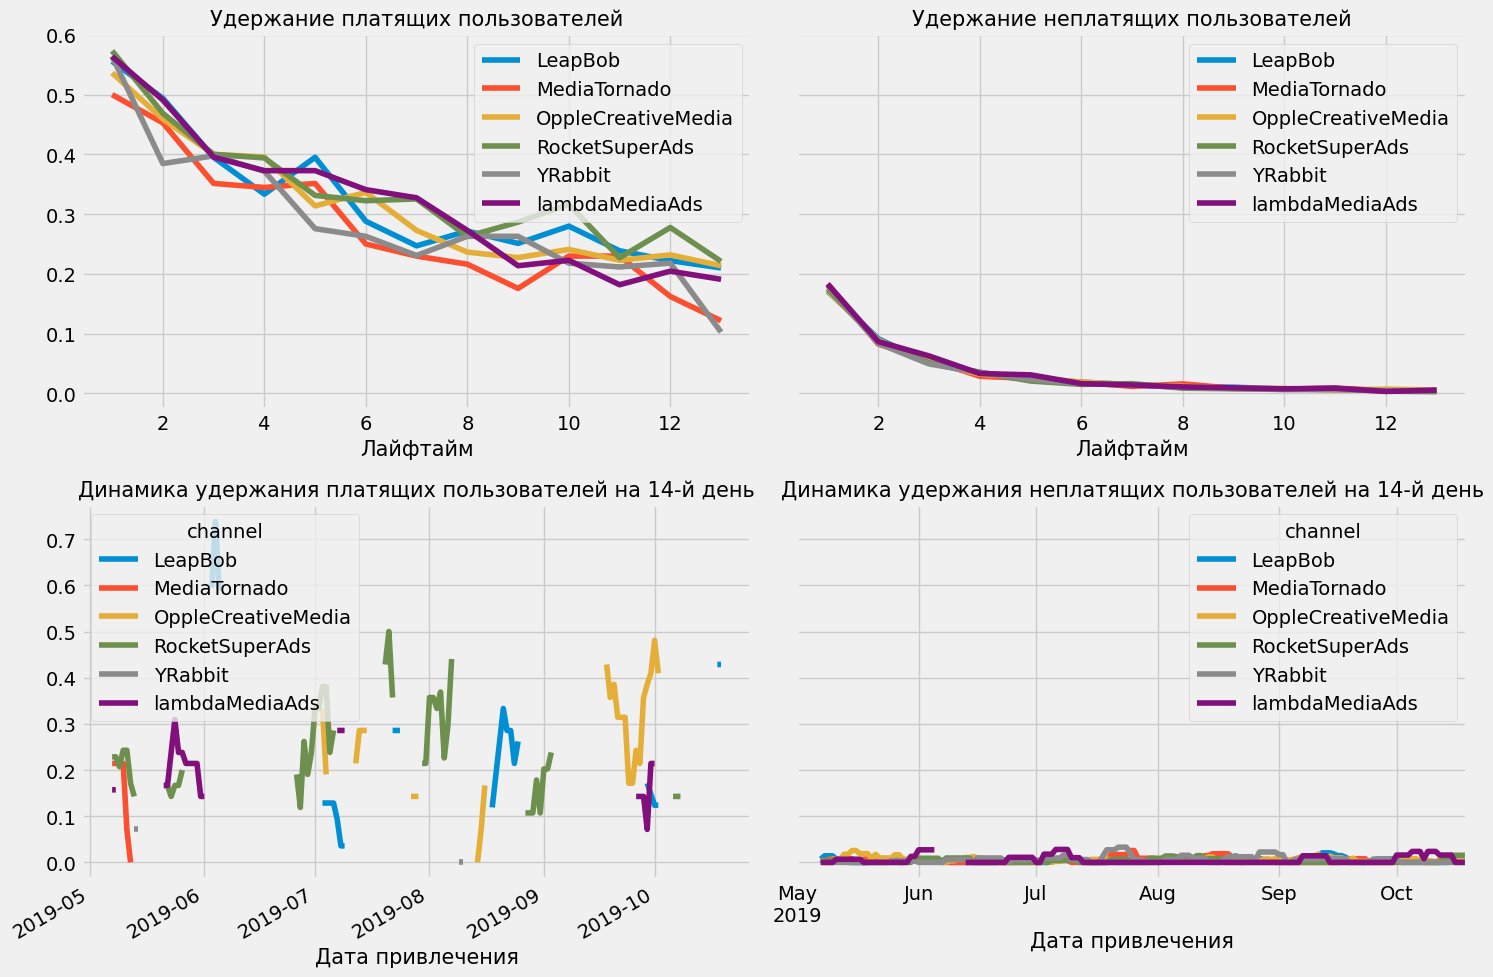

In [50]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_1, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_2, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

TipTop по уровню удержания радует глаз. Это определенно хорошо!
А вот FaceBoom и AdNonSense удивляют... Удерживают платящих на уровне с неплатящими. 
Наверное, их реклама нацелена исключительно на привлечение новых пользователей, а всех остальных каналов - на удержание вновь прибывших. 

Вот почему конверсия у FaceBoom и AdNonSense выше, чем у других каналов...

Судя по динамике удержания на "мелких" каналах, отдел маркетинга мог в течение года прибегать к разным каналам, чтобы найти наиболее подходящий по всем показателям канал. 

Ненадолго вернемся в регионы и посмотрим их конверсию и удержание:

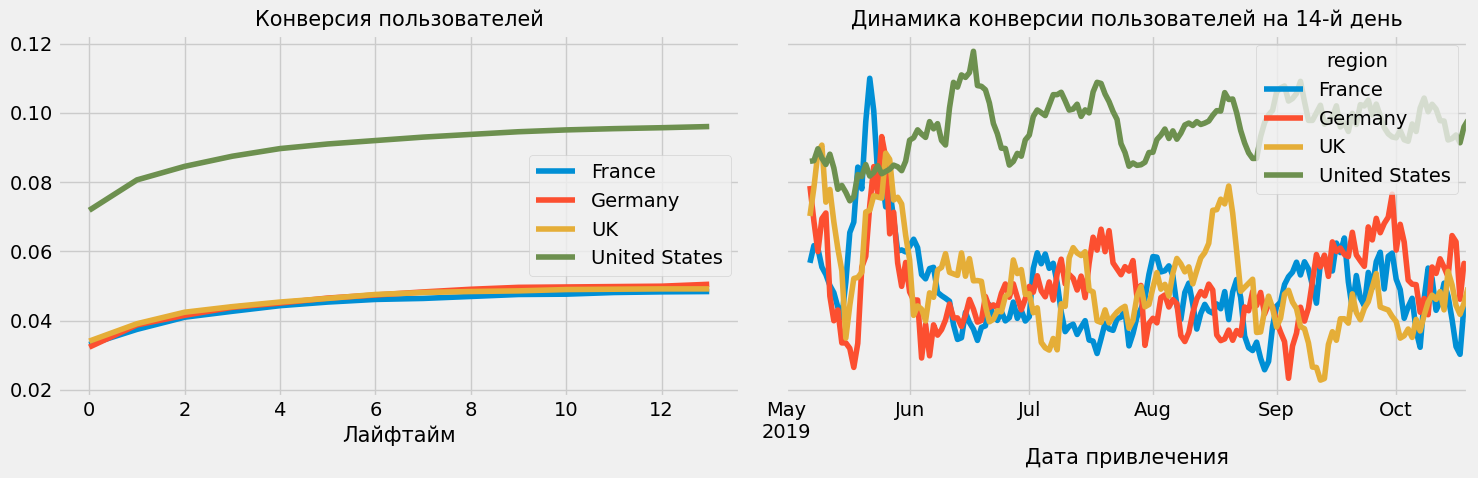

In [51]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

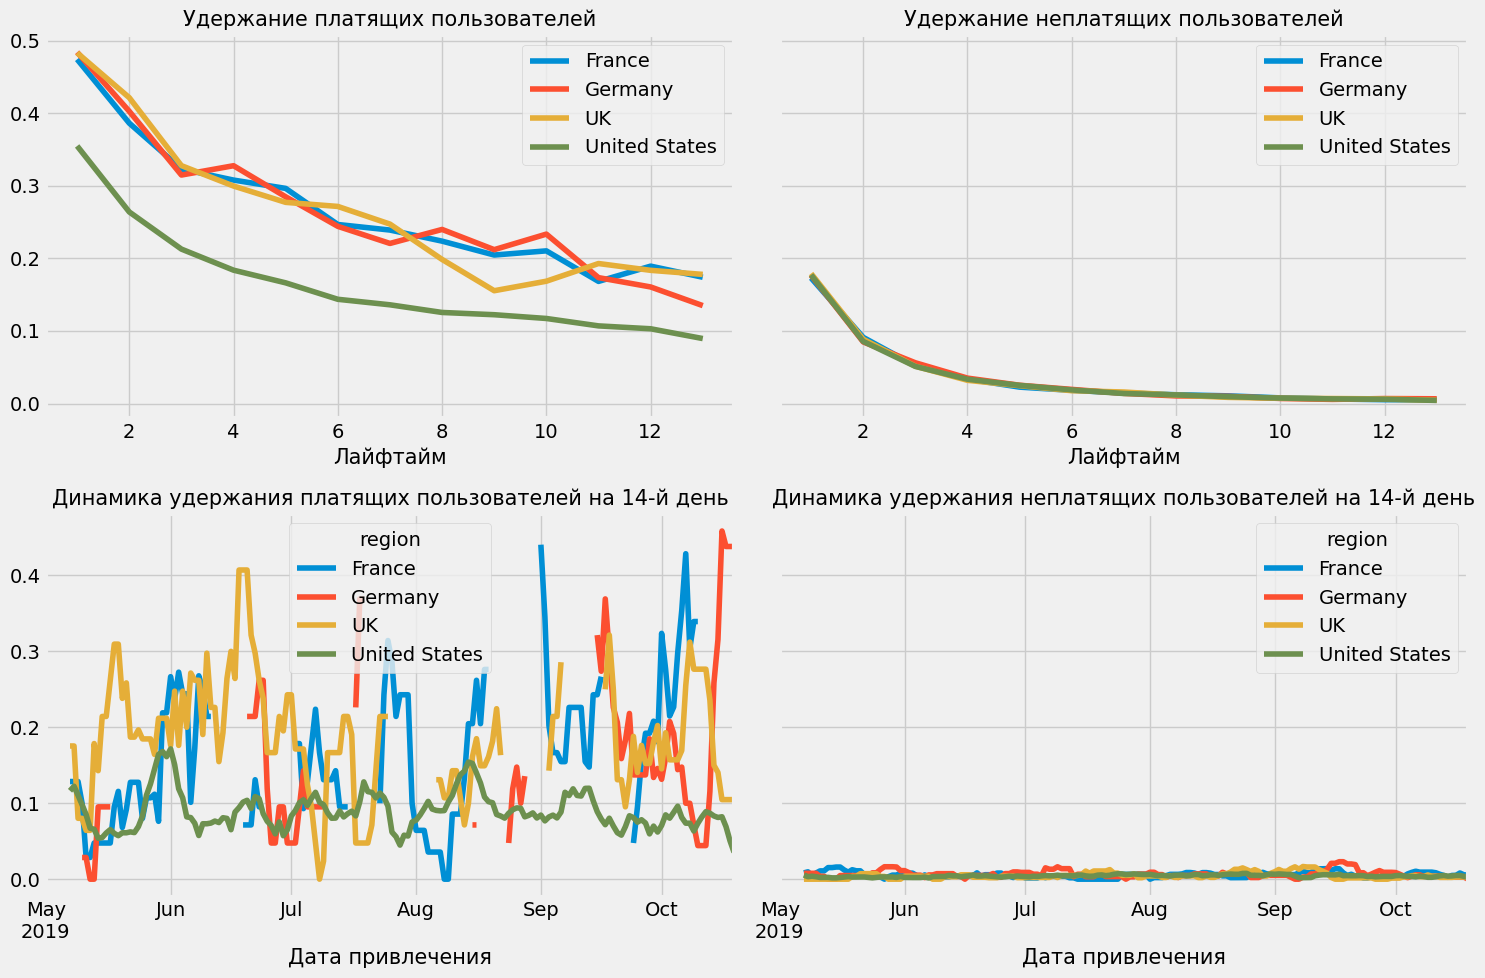

In [52]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Судя по графикам, именно в США вкладываются в конверсию. Однако, судя по графику удержания, американцы чаще прекращают использование приложения. 

Исходя из предыдущих показателей, можно заметить закономерность: больше рекламы в одном регионе - больше конверсия, но меньше удержание в этом регионе. Возможно, людям такое количество рекламы быстро надоедает.


Есть еще гипотеза: на территории США используются каналы по привлечению новых пользователей, а не по их удержанию. 

Проверим (AdNonsense и FaceBoom - "крупные" каналы привлечения, TipTop и WahooNetBanner - "крупные" каналы удержания):

In [53]:
usa_profiles = profiles_1[profiles_1['region'] == 'United States']
need_reg = ['UK', 'Germany', 'France']
other_profiles = profiles_1[profiles_1['region'].isin(need_reg)]

In [54]:
channel_users_usa = pd.DataFrame()

channel_users_usa['users'] = usa_profiles.groupby('channel')['user_id'].count()
channel_users_usa['payers'] = usa_profiles.query('payer == True').groupby('channel')['user_id'].count()
channel_users_usa['percent'] = (channel_users_usa['payers']/channel_users_usa['users'])*100

display(channel_users_usa.sort_values(by='percent', ascending = False))

channel_users_other = pd.DataFrame()

channel_users_other['users'] = other_profiles.groupby('channel')['user_id'].count()
channel_users_other['payers'] = other_profiles.query('payer == True').groupby('channel')['user_id'].count()
channel_users_other['percent'] = (channel_users_other['payers']/channel_users_other['users'])*100

display(channel_users_other.sort_values(by='percent', ascending = False))

users  payers    percent
channel                           
FaceBoom  29144    3557  12.204914
TipTop    19561    1878   9.600736

users  payers    percent
channel                                 
AdNonSense       3880     440  11.340206
WahooNetBanner   8553     453   5.296387

Похоже, что маркетинговая стратегия в США действительно была направлена так же и на удержание, но что-то пошло не так... 

Вернее мы знаем что: слишком много рекламы.

### Выводы

Основные причины неэффективности привлечения пользователей:
- Слишком большое количество ресурсов вложено в рекламу.
- Сделана ставка только на платформы от Apple, хотя окупаемость довольно сильно радует и на других платформах.
- Очень много рекламных средств вложено в Американский регион.
- Слишком много разных каналов привлечения используется. 
- Реклама сосредоточена на удержании пользователей, а не на привлечении новых.
- Сделана ставка на один основной рекламный канал - TipTop. 

Рекомендации:
- Сократить количество средств, вкладываемых в рекламные каналы.
- Распределить бюджет рекламы по платформам: сократить на Mac и iPhone, вложить в PC и Android. Распределение бюджета по платформам нужно сделать 1:1.
- Распределить бюджет рекламы по регионамЖ: сократить для Америки, вложить в Европу. 
- Выбрать 4 основных рекламных канала (organic не входит в этот список) и использовать только их - равномерно распределить бюджет между ними. 
- Пусть 2 самых успешных к удержанию канала будут удерживать пользователей, другие 2 - самые успешные к конверсии и привлечению - занимаются привлечением. 
- Сократить количество рекламы, направленной на удержание.